In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
from scipy.optimize import fsolve

1) y'' + 9y = cos(t), y(π) = −5/3, y'(0) = 5 with solve ivp

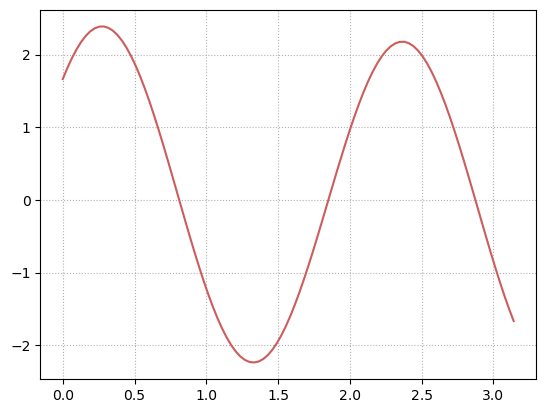

In [2]:
def ode(t, Y):
    
    y, yp = Y
    ypp = -9*y + np.cos(t)
    
    return np.array([yp, ypp])

def objective(u):
    
    r = np.zeros(len(u))
    # the initial value of y(0) is not known - u[0]
    sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
    y, yp = sol.y
    r[0] = y[-1] + 5/3 # as y(π) + 5/3 = 0 
    
    return r

t = np.linspace(0, np.pi, 100)

# the starting estimate for the roots o
u = 0.5
# fsolve returns the roots of f(x) = 0
u = fsolve(objective, u)

sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
y, yp = sol.y

plt.plot(sol.t, y, color = 'indianred')
plt.grid(linestyle='dotted')

1) y'' + 9y = cos(t), y(π) = −5/3, y'(0) = 5 with solve_bvp

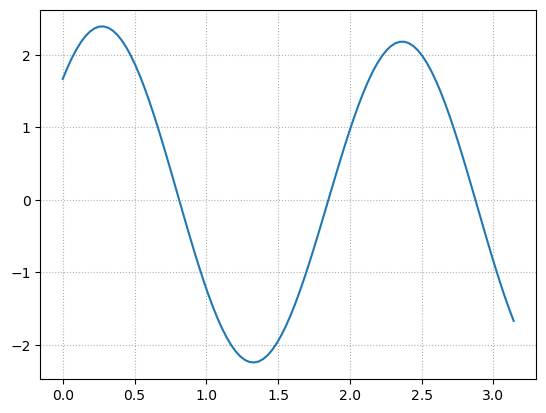

In [3]:
def ode(x, Y):
    
    y, yp = Y
    ypp = -9*y + np.cos(x)
    
    return np.array([yp, ypp])

def bc(ya, yb):
    
    left_y, left_yp = ya
    right_y, right_yp = yb
    
    return np.array([left_yp - 5, right_y + 5/3, ])

x = np.linspace(0, np.pi, 100)
y = np.zeros((2, x.size))

sol = solve_bvp(ode, bc, x, y)

y, yp = sol.y

plt.plot(sol.x, y)
plt.grid(linestyle='dotted')

2) y''''(x) = x, y(0) = 0, y(1) = 0, y''(0) = 0, y''(1) = 0 with solve_bvp

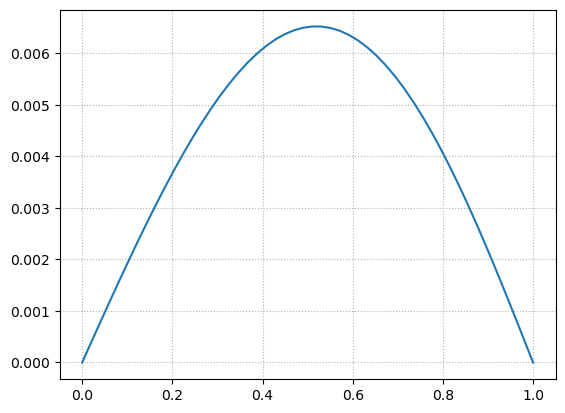

In [4]:
def fun(x, Y):
    
    y, yp, ypp, yppp = Y
    ypppp = x
    
    return [yp, ypp, yppp, ypppp]

# ya: lower boundary which is 0 and yb: maximum boundary which is 1 for this example
def bc(ya, yb):
    
    # unpack y, yp, ypp, yppp for left and right side
    left_y, left_yp, left_ypp, left_yppp = ya
    right_y, right_yp, right_ypp, right_yppp = yb
    
    return np.array([left_y - 0, left_ypp - 0, right_y - 0, right_ypp - 0])

x = np.linspace(0, 1, 50)
y = np.zeros((4, x.size)) # because wigh have 4 arrays from to return from bc function

sol = solve_bvp(fun, bc, x, y)

y, yp, ypp, yppp = sol.y

plt.plot(sol.x, y)
plt.grid(linestyle='dotted')

3) y'' + k**2 * y = 0, y(0) = y(1) = 0

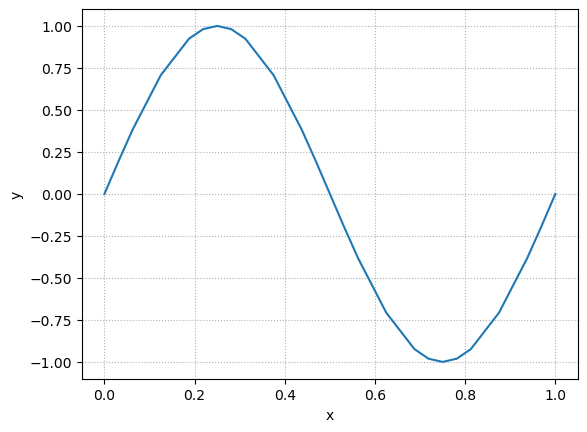

In [5]:
def fun(x, Y, k):
    
    y, yp = Y
    ypp = -y*k**2
    
    return [yp, ypp]

# ya stands for y(0) and yb stands for y(1)
def bc(ya, yb, p):
    
    left_y, left_yp = ya
    right_y, right_yp = yb
    # boundary condition residual
    k = p[0]

    return np.array([left_y - 0, left_yp - k, right_y - 0]) # y'(0) = k

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1

# solve bvp
sol = solve_bvp(fun, bc, x, y, p=[6])

y, yp = sol.y

plt.plot(sol.x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='dotted')

***In numerical analysis, the shooting method is a method for solving a boundary value problem by reducing it to an initial value problem.***

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


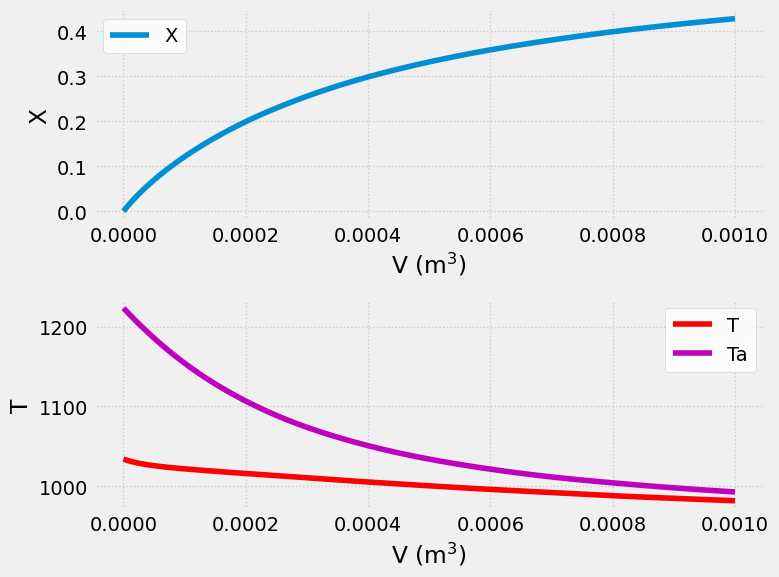

In [6]:
# define consant values
Fao = 0.0376
Cpa = 163
delCp = -9
Cao = 18.8
To = 1035
Ua = 16500
mc = 0.111
Cpc = 34.5

def odes(x, Y):

    # assign each ODE (ordinary differential equation) to a vector element
    X, T, Ta = Y
    
    # define explicit equations 
    ra = -Cao*3.58*np.exp(34222*(1/To-1/T))*(1-X)*(To/T)/(1+X)
    deltaH = 80770 + delCp*(T-298)
    
    # define each ODE
    dxdV = -ra/Fao
    dTdV = (Ua*(Ta-T)+ra*deltaH)/(Fao*(Cpa+X*delCp))
    dTadV = Ua*(T-Ta)/mc/Cpc

    return np.array([dxdV, dTdV, dTadV])

y0 = [0.0, 1034., 1223.]

V = np.linspace(0, 0.001, 1000)

sol = solve_ivp(odes, [V[0], V[-1]], y0, t_eval = V)

X, T, Ta = sol.y

# you can choose from different plt styles
print(plt.style.available)
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows = 2, figsize = (8,6), dpi = 100)

ax[0].plot(sol.t, X, label = 'X')
ax[0].set_ylabel("X")
ax[0].set_xlabel("V (m$^3$)")
ax[0].legend(facecolor='white')
ax[0].grid(linestyle='dotted')

ax[1].plot(sol.t, T, "r-", label= "T")
ax[1].plot(sol.t, Ta, "m-", label= "Ta")
ax[1].set_ylabel("T")
ax[1].set_xlabel("V (m$^3$)")
ax[1].legend(facecolor='white')
ax[1].grid(linestyle='dotted')

fig.tight_layout()